In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import InputLayer, Conv2D, Flatten, Reshape, Dropout, Bidirectional, GRU, Dense
from keras.metrics import Recall, Precision
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
save_dir = "/content/drive/My Drive/transformer_code/lets_try_image_processing//data/model2_data"

In [5]:
train_x0 = np.load(f"{save_dir}/train_x.npy", allow_pickle=True).astype('float32')
train_x0 = train_x0.reshape(len(train_x0), 200, 13, 17, 1)
train_y0 = np.load(f"{save_dir}/train_y.npy", allow_pickle=True).astype('uint32')
train_y0 = train_y0.reshape(len(train_y0), 200, 1)
test_x0 = np.load(f"{save_dir}/test_x.npy", allow_pickle=True).astype('float32')
test_x0 = test_x0.reshape(len(test_x0), 200, 13, 17, 1)
test_y0 = np.load(f"{save_dir}/test_y.npy", allow_pickle=True).astype('uint32')
test_y0 = test_y0.reshape(len(test_y0), 200, 1)

# val_x0 = test_x0[200:]
# test_x0 = test_x0[:200]
# val_y0 = test_y0[200:]
# test_y0 = test_y0[:200]

print(train_x0.shape, train_y0.shape, test_x0.shape, test_y0.shape)

(1285, 200, 13, 17, 1) (1285, 200, 1) (321, 200, 13, 17, 1) (321, 200, 1)


In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(200,13,17,1)))
# model.add(Rescaling(1./255))
model.add(Conv2D(30, kernel_size=(3,3), input_shape=(13,17,1), activation='relu'))
model.add(Conv2D(60, kernel_size=(4,2), activation='relu' ))
model.add(Flatten())
model.add(Reshape((200, 6720)))
model.add(Dropout(0.4))
model.add(Bidirectional(GRU(80, activation='relu', return_sequences=True)))
# model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='BinaryCrossentropy', 
              metrics=['accuracy',Recall(),Precision()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 11, 15, 30)   300       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 8, 14, 60)    14460     
                                                                 
 flatten (Flatten)           (None, 1344000)           0         
                                                                 
 reshape (Reshape)           (None, 200, 6720)         0         
                                                                 
 dropout (Dropout)           (None, 200, 6720)         0         
                                                                 
 bidirectional (Bidirectiona  (None, 200, 160)         3264960   
 l)                                                              
                                                        

In [6]:
batchsize = 18
epochs = 45

In [ ]:
history = model.fit(train_x0, train_y0, batch_size = batchsize, epochs = epochs)
# history = model.fit(train_x0, train_y0, batch_size = batchsize, epochs = epochs, validation_data=[val_x0, val_y0])

Epoch 1/45
72/72 [==============================] - 81s 977ms/step - loss: 0.2600 - accuracy: 0.9061 - recall: 0.0126 - precision: 0.0898
Epoch 2/45
72/72 [==============================] - 68s 944ms/step - loss: 0.1976 - accuracy: 0.9272 - recall: 0.1993 - precision: 0.7584
Epoch 3/45
72/72 [==============================] - 69s 959ms/step - loss: 0.1708 - accuracy: 0.9401 - recall: 0.4005 - precision: 0.7827
Epoch 4/45
72/72 [==============================] - 68s 949ms/step - loss: 0.1524 - accuracy: 0.9456 - recall: 0.4861 - precision: 0.7874
Epoch 5/45
72/72 [==============================] - 71s 986ms/step - loss: 0.1404 - accuracy: 0.9489 - recall: 0.5214 - precision: 0.8027
Epoch 6/45
72/72 [==============================] - 69s 960ms/step - loss: 0.1327 - accuracy: 0.9520 - recall: 0.5653 - precision: 0.8077
Epoch 7/45
72/72 [==============================] - 68s 949ms/step - loss: 0.1266 - accuracy: 0.9527 - recall: 0.5656 - precision: 0.8170
Epoch 8/45
72/72 [================

In [7]:
# model_path = f"{save_dir}/model_0.h5"
model_path = f"{save_dir}/model_1.h5"

In [10]:
model.save(model_path)

In [ ]:
np.save(f"{save_dir}/model_history.npy",history.history)

In [9]:
model = load_model(model_path)

In [11]:
history = np.load(f"{save_dir}/model_history.npy",allow_pickle='TRUE').item()
# # Getting recall and precision value
# recall,precision,val_recall,val_precision =  history['recall'], history['precision'],history['val_recall'], history['val_precision']


In [ ]:
# # Plot the recall curve
# plt.title('Recall Curve')
# epochs = range (1,len(recall) + 1)
# plt.plot(epochs, recall, 'red', label='Training recall')
# plt.plot(epochs, val_recall, 'blue', label='Validation recall')
# plt.legend()
# plt.show()

In [ ]:
# #Plot the precision curve
# plt.title('Precision curve')
# plt.plot(epochs, precision, 'red', label='Training precision')
# plt.plot(epochs, val_precision, 'blue', label='Validation precision')
# plt.legend()
# plt.show()

In [12]:
to_predict = test_x0
true_values = test_y0

In [13]:
predictions = model.predict(to_predict, batch_size=batchsize)

18/18 [==============================] - 9s 89ms/step


In [14]:
for i in range(len(predictions)):
  for j in range(predictions.shape[1]):
    if predictions[i][j] < 0.5:
      predictions[i][j] = 0
    else:
      predictions[i][j] = 1
predictions.flatten().shape

(64200,)

In [15]:
cfm = confusion_matrix(np.array(true_values.flatten()), np.array(predictions.flatten()))
cfm

array([[59911,   511],
       [ 1120,  2658]])

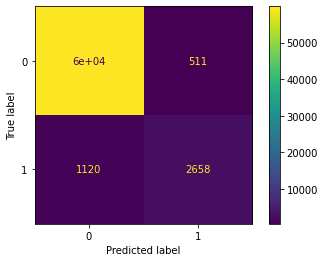

In [16]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [17]:
accuracy = (true_values == predictions).sum() / len(true_values.flatten())
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
precision = TP / (TP+FP)
sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)

In [ ]:
print("accuracy:", accuracy, "\nprecision:", precision, "\nsensitivity:", sensitivity, "\nspecificity:", specificity)

In [ ]:
unique, counts = np.unique(true_values, return_counts=True)
np.array(np.asarray((unique, counts)).T).astype('int')[1][1]/len(true_values.flatten())